In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# 📁 Dataset

In [2]:
columns = ['sepal_length',"sepal_width",'petal_length',"petal_width", 'species'] 
df=pd.read_csv(r"C:\Users\hp\Downloads\archive (7)/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#see the number of rows and column:
print("rows , columns : "+str(df.shape))

rows , columns : (150, 5)


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#check null values 
print(df.isna().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [6]:
#check duplicate value:
df.duplicated().sum()

3

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(147, 5)

# Data Visualization 📊📈📉

<AxesSubplot:xlabel='species', ylabel='count'>

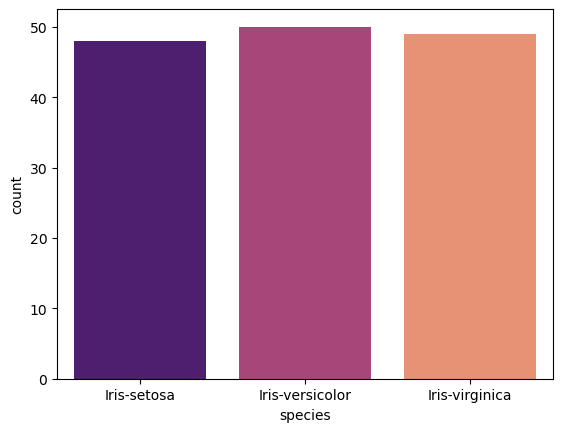

In [9]:
sns.countplot(x="species",data=df,palette="magma")

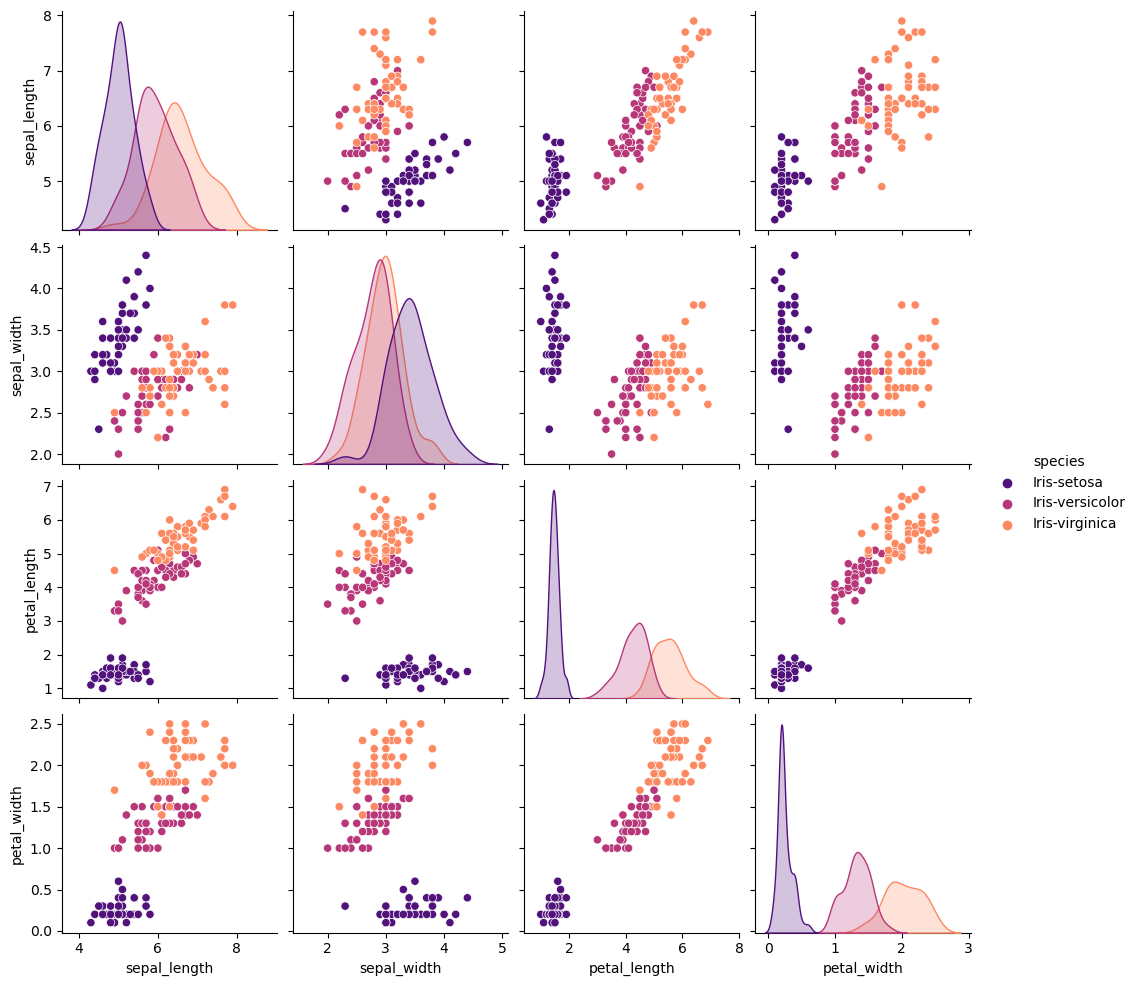

In [10]:
sns.pairplot(df,hue="species",palette="magma")

In [11]:
# Separate features and target  
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [12]:
# Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

# 📊 Bar Plot

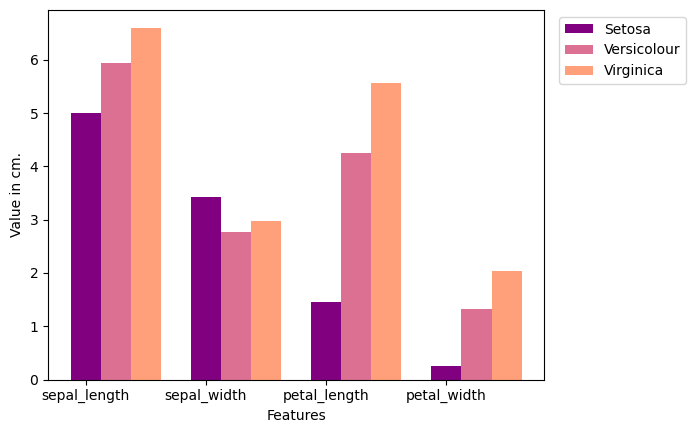

In [13]:
# Plot the average
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa',color="purple")
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour',color="palevioletred")
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica',color="lightsalmon")
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

# 🛠️ Feature Engineering 

In [14]:
X = df.drop("species",axis=1)
Y = df["species"]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

# 📈Model Training: Logistic Regression

In [16]:
LR=LogisticRegression()

In [17]:
LR.fit(x_train,y_train)

LogisticRegression()

In [18]:
LR_pred=LR.predict(x_test)
LRP=LR.predict(X)

# 🧪Model Evaluation 


In [19]:
confusion_matrix(y_test,LR_pred)

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  2,  9]], dtype=int64)

# 🧪Model Accuracy score


In [20]:
LRa=accuracy_score(y_test,LR_pred)
LRa

0.9333333333333333

# 🎯Model Predictions 

In [21]:
print(df.loc[0])
print(LRP[0])

sepal_length            5.1
sepal_width             3.5
petal_length            1.4
petal_width             0.2
species         Iris-setosa
Name: 0, dtype: object
Iris-setosa


In [22]:
X_new = np.array([[3, 2,4,5], [  4.9, 2.2,4.3,2 ], [  6.3, 3.5,4.6,2]])

In [23]:
#Prediction of the species from the input vector
prediction = LR.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-virginica' 'Iris-versicolor' 'Iris-versicolor']


# 📈 K-Nearest Neighbour (KNN)

In [24]:
KN=KNeighborsClassifier(n_neighbors=4)

In [25]:
KN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [26]:
KN_pred=KN.predict(x_test)
KNP=KN.predict(X)

# 🧪Model Evaluation 


In [27]:
confusion_matrix(y_test,KN_pred)

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  2,  9]], dtype=int64)

# 🧪Model Accuracy score


In [28]:
KNa=accuracy_score(y_test,KN_pred)
KNa

0.9333333333333333

# 🎯Model Predictions 

In [29]:
print(df.loc[0])
print(KNP[0])

sepal_length            5.1
sepal_width             3.5
petal_length            1.4
petal_width             0.2
species         Iris-setosa
Name: 0, dtype: object
Iris-setosa


In [30]:
#Prediction of the species from the input vector
prediction = KN.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-virginica' 'Iris-versicolor' 'Iris-versicolor']


# 📈 Decision Tree classifier

In [31]:
DT=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)

In [32]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [33]:
DT_pred=DT.predict(x_test)
DTP=DT.predict(X)

# 🧪Model Evaluation 


In [34]:
confusion_matrix(y_test,DT_pred)

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  1, 10]], dtype=int64)

# 🧪Model Accuracy score


In [35]:
DTa=accuracy_score(y_test,DT_pred)
DTa

0.9666666666666667

# 🎯Model Predictions 

In [36]:
print(df.loc[0])
print(DTP[0])

sepal_length            5.1
sepal_width             3.5
petal_length            1.4
petal_width             0.2
species         Iris-setosa
Name: 0, dtype: object
Iris-setosa


In [37]:
#Prediction of the species from the input vector
prediction = DT.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-virginica' 'Iris-virginica' 'Iris-virginica']


# 📈Support Vector Classifier 

In [38]:
SV=SVC()

In [39]:
SV.fit(x_train,y_train)

SVC()

In [40]:
SV_pred=SV.predict(x_test)
SVP=SV.predict(X)

# 🧪Model Evaluation 


In [41]:
confusion_matrix(y_test,SV_pred)

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  3,  8]], dtype=int64)

# 🧪Model Accuracy score


In [42]:
SVa=accuracy_score(y_test,SV_pred)
SVa

0.9

# 🎯Model Predictions 

In [43]:
print(df.loc[0])
print(SVP[0])

sepal_length            5.1
sepal_width             3.5
petal_length            1.4
petal_width             0.2
species         Iris-setosa
Name: 0, dtype: object
Iris-setosa


In [44]:
#Prediction of the species from the input vector
prediction = SV.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-virginica' 'Iris-versicolor' 'Iris-versicolor']


# 🧪All Model Accuracy score


In [45]:
accuracy=[LRa,KNa,DTa,SVa]

Text(0, 0.5, 'ACCURACY SCORE')

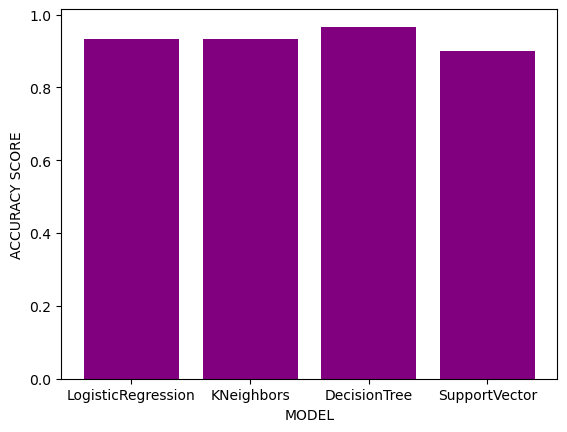

In [46]:
plt.bar(["LogisticRegression","KNeighbors","DecisionTree","SupportVector"],accuracy,color="purple")
plt.xlabel("MODEL")
plt.ylabel("ACCURACY SCORE")

# 🎯All Model Predictions 

In [ ]:
sepal_length=float(input("Enter sepal length: "))
sepal_width=float(input("Enter sepal width: "))
petal_length=float(input("Enter petal length: "))
petal_width=float(input("Enter petal width: "))
var=np.array([[sepal_length,sepal_width,petal_length,petal_width]])
prediction1 = LR.predict(var)
prediction2 = KN.predict(var)
prediction3 = DT.predict(var)
prediction4 = SV.predict(var)
print("Prediction of Species(LOGISTIC REGRESSION): {}".format(prediction1))
print("Prediction of Species(K NEIGHBORS): {}".format(prediction2))
print("Prediction of Species(DECISION TREE): {}".format(prediction3))
print("Prediction of Species(SUPPORT VECTOR): {}".format(prediction4))